In [1]:
train_url_list = ["https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow"]

test_url_list = ["https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow"]

In [2]:
import pandas as pd
from tqdm import tqdm

final_df = pd.DataFrame()
for url in tqdm(train_url_list):
    df = pd.read_csv(url)
    final_df = pd.concat([final_df, df])

final_df.to_csv("ctu_13_train_data.csv", index=False)

final_df = pd.DataFrame()
for url in tqdm(test_url_list):
    df = pd.read_csv(url)
    final_df = pd.concat([final_df, df])

final_df.to_csv("ctu_13_test_data.csv", index=False)

del final_df

100%|██████████| 2/2 [00:45<00:00, 22.54s/it]


In [3]:
!pip install scikit-plot scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/ctu_13_train_data.csv')
test_data = pd.read_csv('/content/ctu_13_test_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,flow=Background-UDP-Established
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,flow=Background-UDP-Established
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,flow=Background
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,flow=Background
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,flow=Background-UDP-Established


In [2]:
# df['SrcAddr'] = np.random.permutation(df['SrcAddr'])
# df['Sport'] = np.random.permutation(df['Sport'])

# Function to randomize IP address
# def randomize_ip():
#     return f"{np.random.randint(0, 256)}.{np.random.randint(0, 256)}.{np.random.randint(0, 256)}.{np.random.randint(0, 256)}"

# # Function to randomize port
# def randomize_port():
#     return np.random.randint(1024, 65536)  # Registered and dynamic ports

# # Apply randomization
# data['SrcAddr'] = data['SrcAddr'].apply(lambda x: randomize_ip())
# data['Sport'] = data['Sport'].apply(lambda x: randomize_port())

In [3]:
data.shape

(4632758, 15)

In [4]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

In [5]:
data['Label'].unique()

array(['flow=Background-UDP-Established', 'flow=Background',
       'flow=Background-Established-cmpgw-CVUT',
       'flow=Background-TCP-Established',
       'flow=From-Background-CVUT-Proxy',
       'flow=To-Background-UDP-CVUT-DNS-Server',
       'flow=Background-UDP-Attempt',
       'flow=From-Normal-V42-UDP-CVUT-DNS-Server',
       'flow=Background-UDP-NTP-Established-1',
       'flow=To-Background-CVUT-WebServer',
       'flow=Background-google-analytics3',
       'flow=Background-Attempt-cmpgw-CVUT',
       'flow=To-Background-CVUT-Proxy',
       'flow=Background-google-analytics2',
       'flow=Background-google-analytics6', 'flow=From-Normal-V42-Jist',
       'flow=Background-google-webmail', 'flow=Background-TCP-Attempt',
       'flow=Background-google-analytics12',
       'flow=Background-google-analytics1',
       'flow=Background-google-analytics13',
       'flow=Background-google-analytics14', 'flow=To-Background-Jist',
       'flow=Background-ajax.google', 'flow=From-Nor

In [6]:
def convertlabel(sample_data):
    if "botnet" in sample_data.lower():
        return 2
    elif 'background' in sample_data.lower():
        return 1
    else:
        return 0

data['Label'] = data['Label'].apply(lambda x:convertlabel(x))
test_data['Label'] = test_data['Label'].apply(lambda x:convertlabel(x))

In [7]:
data['Label'].value_counts()

,count
Label,
1,4531349
2,61902
0,39507


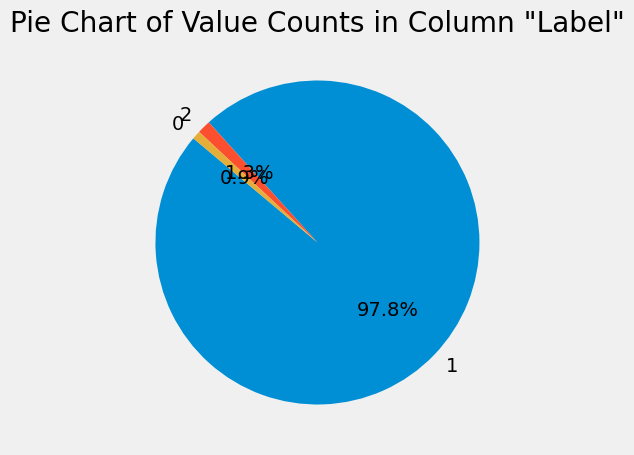

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [9]:
th = 1000
data1 = data[data['Label'] == 0].head(th)
data2 = data[data['Label'] == 1].head(th)
data3 = data[data['Label'] == 2].head(th)

data = pd.concat([data1,data2,data3])

th = 1000
data1 = test_data[test_data['Label'] == 0].head(th)
data2 = test_data[test_data['Label'] == 1].head(th)
data3 = test_data[test_data['Label'] == 2].head(th)

test_data = pd.concat([data1,data2,data3])

test_data.shape

(3000, 15)

In [10]:
data['Label'].value_counts()

,count
Label,
0,1000
1,1000
2,1000


In [11]:
data.to_csv('/content/ctu_13_sample_data.csv', index=False)
test_data.to_csv('/content/ctu_13_sample_test_data.csv', index=False)

In [12]:
data = pd.read_csv('/content/ctu_13_sample_data.csv')
test_data = pd.read_csv('/content/ctu_13_sample_test_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,0.0,NaN,1,141,141,0
1,2011/08/10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,0.0,NaN,1,247,247,0
2,2011/08/10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,0.0,NaN,1,173,173,0
3,2011/08/10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,0.0,0.0,2,207,72,0
4,2011/08/10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,0.0,0.0,2,247,72,0


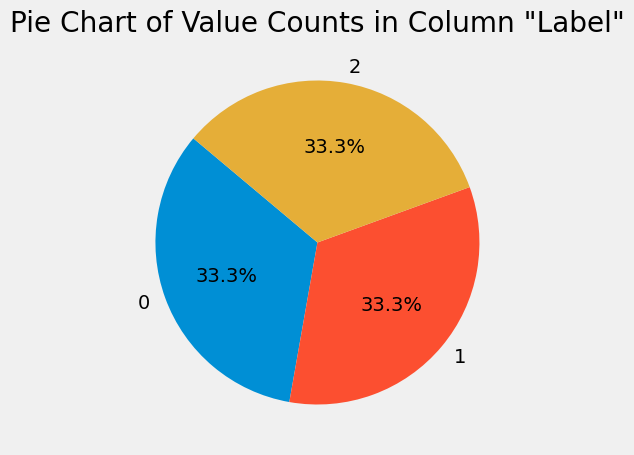

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [14]:
data.dtypes

,0
StartTime,object
Dur,float64
Proto,object
SrcAddr,object
Sport,object
Dir,object
DstAddr,object
Dport,object
State,object
sTos,float64


In [15]:
data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.133333
Dir,0.000000
DstAddr,0.000000
Dport,0.133333
State,0.000000
sTos,0.100000


In [16]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,0.0,NaN,1,141,141,0
1,2011/08/10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,0.0,NaN,1,247,247,0
2,2011/08/10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,0.0,NaN,1,173,173,0
3,2011/08/10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,0.0,0.0,2,207,72,0
4,2011/08/10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,0.0,0.0,2,247,72,0


In [17]:
data = data[pd.to_numeric(data['Sport'], errors='coerce').notnull()]
data['Sport'] = pd.to_numeric(data['Sport'])

test_data = test_data[pd.to_numeric(test_data['Sport'], errors='coerce').notnull()]
test_data['Sport'] = pd.to_numeric(test_data['Sport'])

data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.000000
State,0.000000
sTos,0.000000


In [18]:
data = data[pd.to_numeric(data['Dport'], errors='coerce').notnull()]
data['Dport'] = pd.to_numeric(data['Dport'])

test_data = test_data[pd.to_numeric(test_data['Dport'], errors='coerce').notnull()]
test_data['Dport'] = pd.to_numeric(test_data['Dport'])

data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.000000
State,0.000000
sTos,0.000000


In [19]:
test_data = test_data.fillna(value=0.0)
data = data.fillna(value=0.0)
data.isna().mean() * 100

,0
StartTime,0.0
Dur,0.0
Proto,0.0
SrcAddr,0.0
Sport,0.0
Dir,0.0
DstAddr,0.0
Dport,0.0
State,0.0
sTos,0.0


In [20]:
data.describe()

,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
count,2977.000000,2977.000000,2977.000000,2977.0,2977.0,2977.000000,2.977000e+03,2.977000e+03,2977.000000
mean,453.830185,26762.274437,5238.795768,0.0,0.0,188.256634,1.336155e+05,1.223028e+05,1.000336
std,1083.531994,22960.660812,12049.638971,0.0,0.0,3608.815860,3.202968e+06,3.120164e+06,0.819577
min,0.000000,1.000000,20.000000,0.0,0.0,1.000000,6.000000e+01,6.000000e+01,0.000000
25%,0.000403,1782.000000,53.000000,0.0,0.0,2.000000,1.900000e+02,7.500000e+01,0.000000
50%,0.404371,33107.000000,80.000000,0.0,0.0,3.000000,2.830000e+02,1.860000e+02,1.000000
75%,9.033020,49289.000000,6601.000000,0.0,0.0,10.000000,1.129000e+03,4.570000e+02,2.000000
max,3599.995117,65282.000000,65520.000000,0.0,0.0,162760.000000,1.371365e+08,1.328164e+08,2.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2977 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StartTime  2977 non-null   object 
 1   Dur        2977 non-null   float64
 2   Proto      2977 non-null   object 
 3   SrcAddr    2977 non-null   object 
 4   Sport      2977 non-null   int64  
 5   Dir        2977 non-null   object 
 6   DstAddr    2977 non-null   object 
 7   Dport      2977 non-null   int64  
 8   State      2977 non-null   object 
 9   sTos       2977 non-null   float64
 10  dTos       2977 non-null   float64
 11  TotPkts    2977 non-null   int64  
 12  TotBytes   2977 non-null   int64  
 13  SrcBytes   2977 non-null   int64  
 14  Label      2977 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 372.1+ KB


In [22]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,0.0,0.0,1,141,141,0
1,2011/08/10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,0.0,0.0,1,247,247,0
2,2011/08/10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,0.0,0.0,1,173,173,0
3,2011/08/10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,0.0,0.0,2,207,72,0
4,2011/08/10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,0.0,0.0,2,247,72,0


In [23]:
data['Proto'].value_counts()

,count
Proto,
tcp,1507
udp,1464
rtp,5
rtcp,1


In [24]:
data['Dir'].value_counts()

,count
Dir,
<->,1404
->,1332
<?>,221
?>,20


In [25]:
data['State'].value_counts()

,count
State,
CON,1404
S_,619
FSPA_FSPA,356
PA_PA,95
FSA_FSA,86
...,...
PA_PAC,1
PA_FPA,1
FRPA_RA,1


In [26]:
data.isna().sum().sum()

0

In [27]:
data.duplicated().sum()

0

In [28]:
data['StartTime'] = pd.to_datetime(data['StartTime'])
data['Hour'] = data['StartTime'].dt.hour
data['Minute'] = data['StartTime'].dt.minute
data['Second'] = data['StartTime'].dt.second
data['DayOfWeek'] = data['StartTime'].dt.dayofweek
data['Day'] = data['StartTime'].dt.day

test_data['StartTime'] = pd.to_datetime(test_data['StartTime'])
test_data['Hour'] = test_data['StartTime'].dt.hour
test_data['Minute'] = test_data['StartTime'].dt.minute
test_data['Second'] = test_data['StartTime'].dt.second
test_data['DayOfWeek'] = test_data['StartTime'].dt.dayofweek
test_data['Day'] = test_data['StartTime'].dt.day

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2977 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   StartTime  2977 non-null   datetime64[ns]
 1   Dur        2977 non-null   float64       
 2   Proto      2977 non-null   object        
 3   SrcAddr    2977 non-null   object        
 4   Sport      2977 non-null   int64         
 5   Dir        2977 non-null   object        
 6   DstAddr    2977 non-null   object        
 7   Dport      2977 non-null   int64         
 8   State      2977 non-null   object        
 9   sTos       2977 non-null   float64       
 10  dTos       2977 non-null   float64       
 11  TotPkts    2977 non-null   int64         
 12  TotBytes   2977 non-null   int64         
 13  SrcBytes   2977 non-null   int64         
 14  Label      2977 non-null   int64         
 15  Hour       2977 non-null   int32         
 16  Minute     2977 non-null   int32         
 17  

In [30]:
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']
numerical_columns = [col for col in data.columns if col not in categorical_columns]

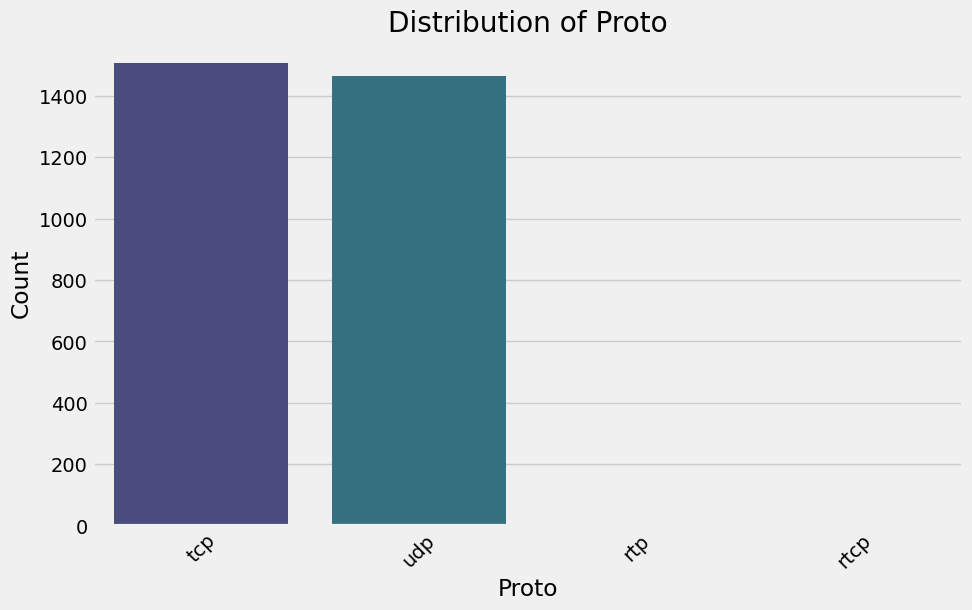

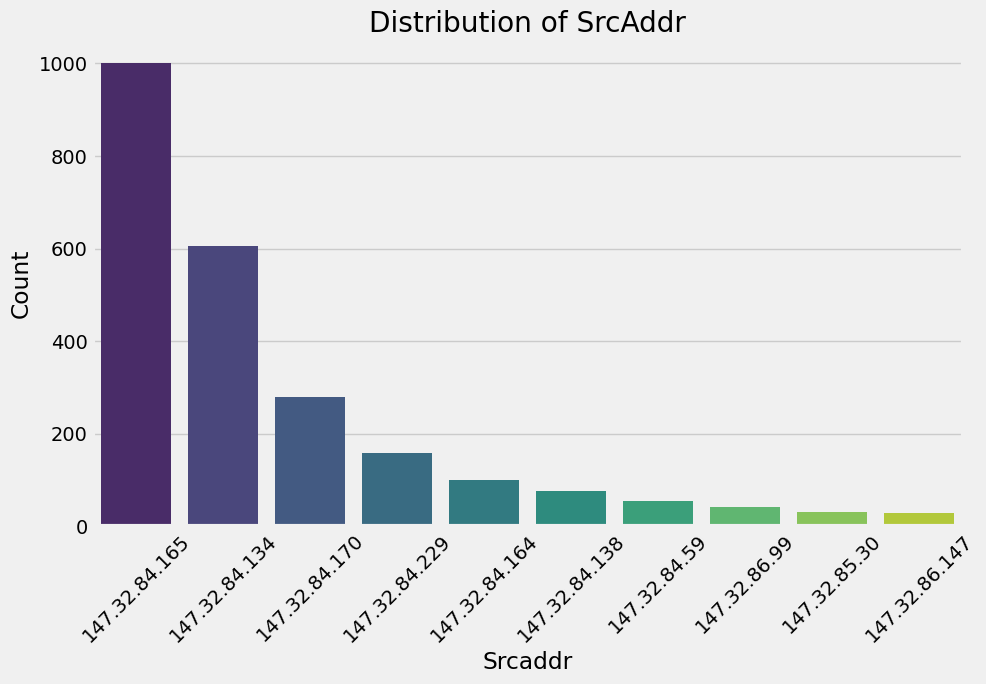

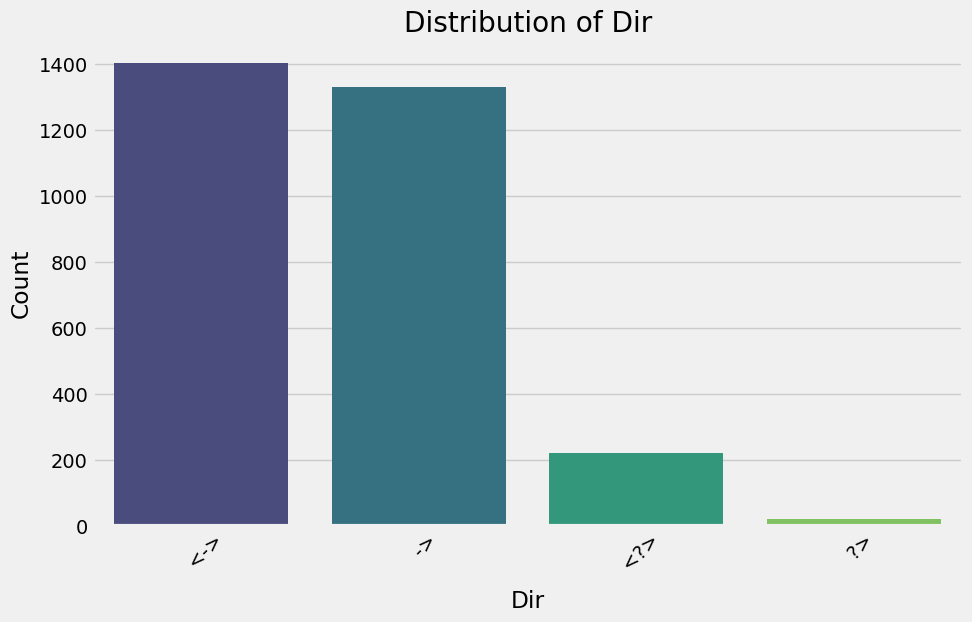

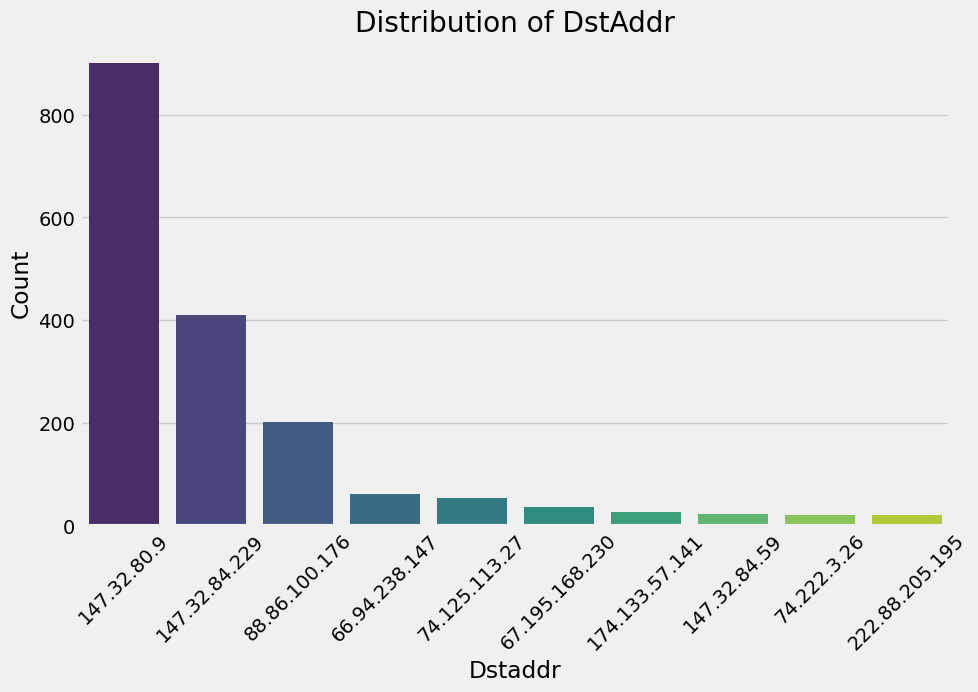

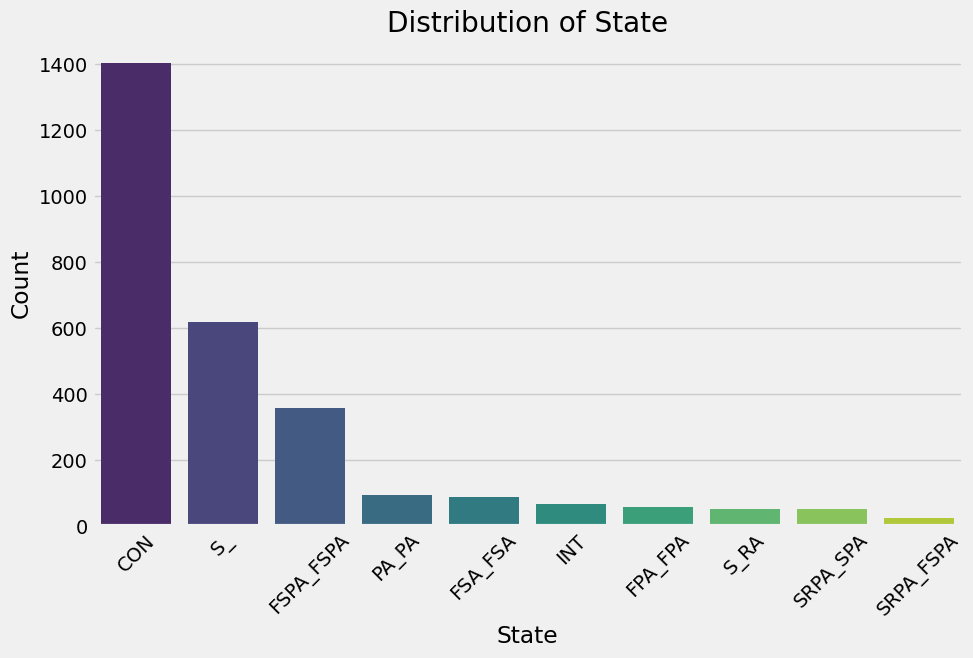

In [31]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']

# Plotting each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().head(10).index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print('\n\n')

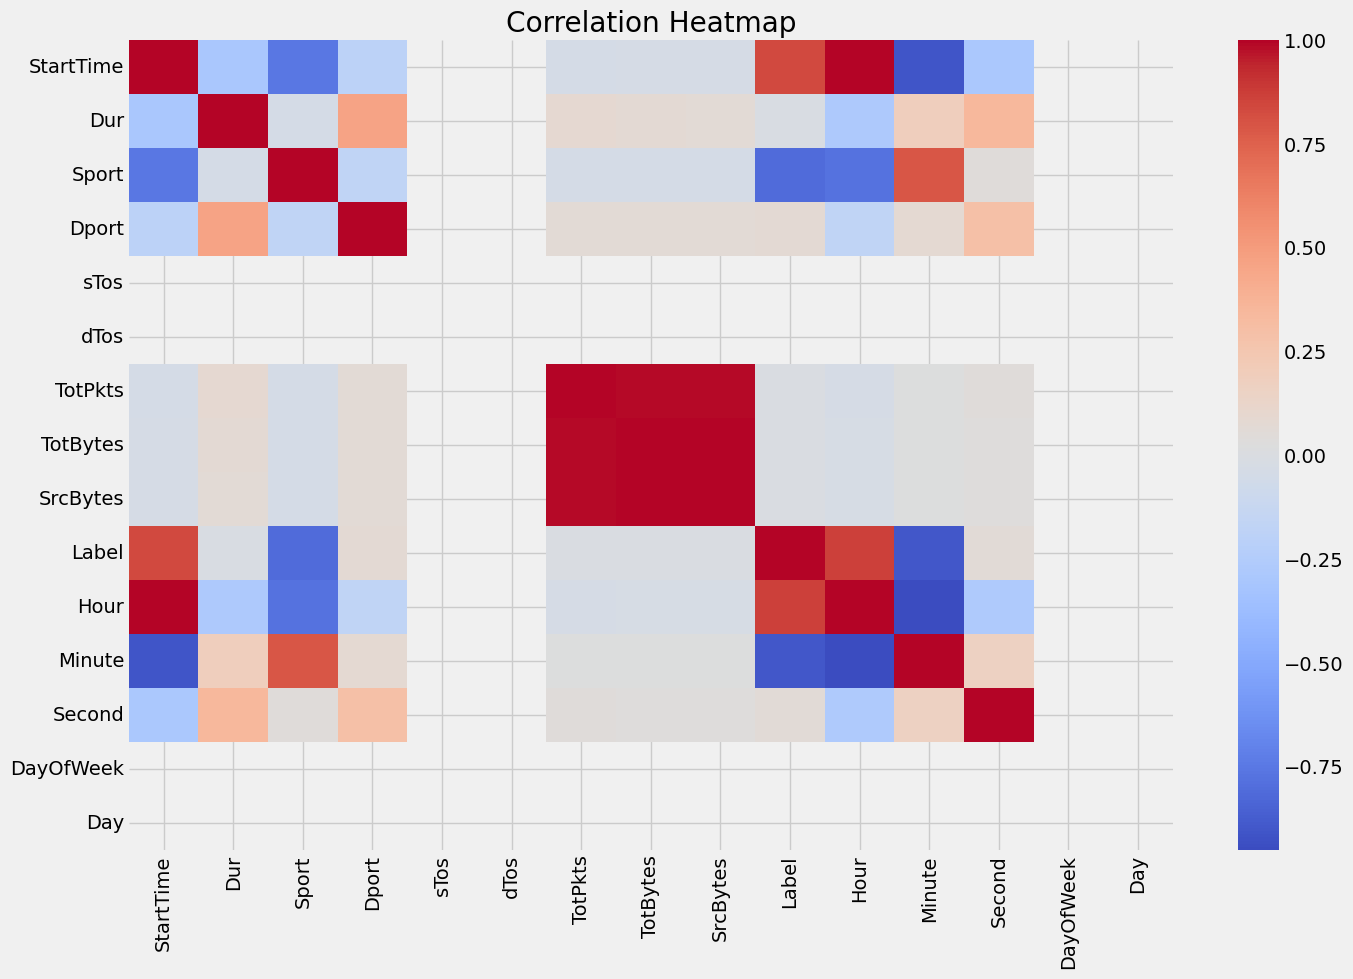

In [32]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [33]:
data[numerical_columns].corr()['Dur'].sort_values(ascending=False)

,Dur
Dur,1.000000
Dport,0.459872
Second,0.350342
Minute,0.187611
TotPkts,0.091555
TotBytes,0.071425
SrcBytes,0.068174
Label,-0.006575
Sport,-0.042020
Hour,-0.278567


In [34]:
data[numerical_columns].corr()

,StartTime,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second,DayOfWeek,Day
StartTime,1.000000,-0.302288,-0.758454,-0.195426,NaN,NaN,-0.036770,-0.030991,-0.029962,0.837608,0.994256,-0.912745,-0.295197,NaN,NaN
Dur,-0.302288,1.000000,-0.042020,0.459872,NaN,NaN,0.091555,0.071425,0.068174,-0.006575,-0.278567,0.187611,0.350342,NaN,NaN
Sport,-0.758454,-0.042020,1.000000,-0.173657,NaN,NaN,-0.039616,-0.040581,-0.040822,-0.811758,-0.778441,0.787759,0.045250,NaN,NaN
Dport,-0.195426,0.459872,-0.173657,1.000000,NaN,NaN,0.066875,0.062880,0.062798,0.071214,-0.170593,0.084048,0.295801,NaN,NaN
sTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotPkts,-0.036770,0.091555,-0.039616,0.066875,NaN,NaN,1.000000,0.988008,0.985851,0.000909,-0.033749,0.022348,0.041299,NaN,NaN
TotBytes,-0.030991,0.071425,-0.040581,0.062880,NaN,NaN,0.988008,1.000000,0.999703,0.000455,-0.028563,0.019285,0.034662,NaN,NaN
SrcBytes,-0.029962,0.068174,-0.040822,0.062798,NaN,NaN,0.985851,0.999703,1.000000,0.000045,-0.027660,0.018826,0.032958,NaN,NaN
Label,0.837608,-0.006575,-0.811758,0.071214,NaN,NaN,0.000909,0.000455,0.000045,1.000000,0.867629,-0.902161,0.056914,NaN,NaN


In [35]:
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
constant_columns

['sTos', 'dTos', 'DayOfWeek', 'Day']

In [36]:
data[constant_columns[0]].value_counts()

,count
sTos,
0.0,2977


In [37]:
data = data.drop(columns=constant_columns)
test_data = test_data.drop(columns=constant_columns)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second
0,2011-08-10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,1,141,141,0,9,46,53
1,2011-08-10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,1,247,247,0,9,46,54
2,2011-08-10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,1,173,173,0,9,46,54
3,2011-08-10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,2,207,72,0,9,46,54
4,2011-08-10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,2,247,72,0,9,46,54


In [38]:
# Calculate the correlation matrix
corr_matrix = data[numerical_columns].corr().abs()

# Select upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
threshold = 0.8
high_corr_features = [column for column in upper.columns if any(upper[column] > threshold)]
high_corr_features

['TotBytes', 'SrcBytes', 'Label', 'Hour', 'Minute']

In [39]:
if 'Label' in high_corr_features:
    high_corr_features.remove('Label')
high_corr_features

['TotBytes', 'SrcBytes', 'Hour', 'Minute']

In [40]:
data = data.drop(columns=high_corr_features)
test_data = test_data.drop(columns=high_corr_features)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Second
0,2011-08-10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,1,0,53
1,2011-08-10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,1,0,54
2,2011-08-10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,1,0,54
3,2011-08-10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,2,0,54
4,2011-08-10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,2,0,54


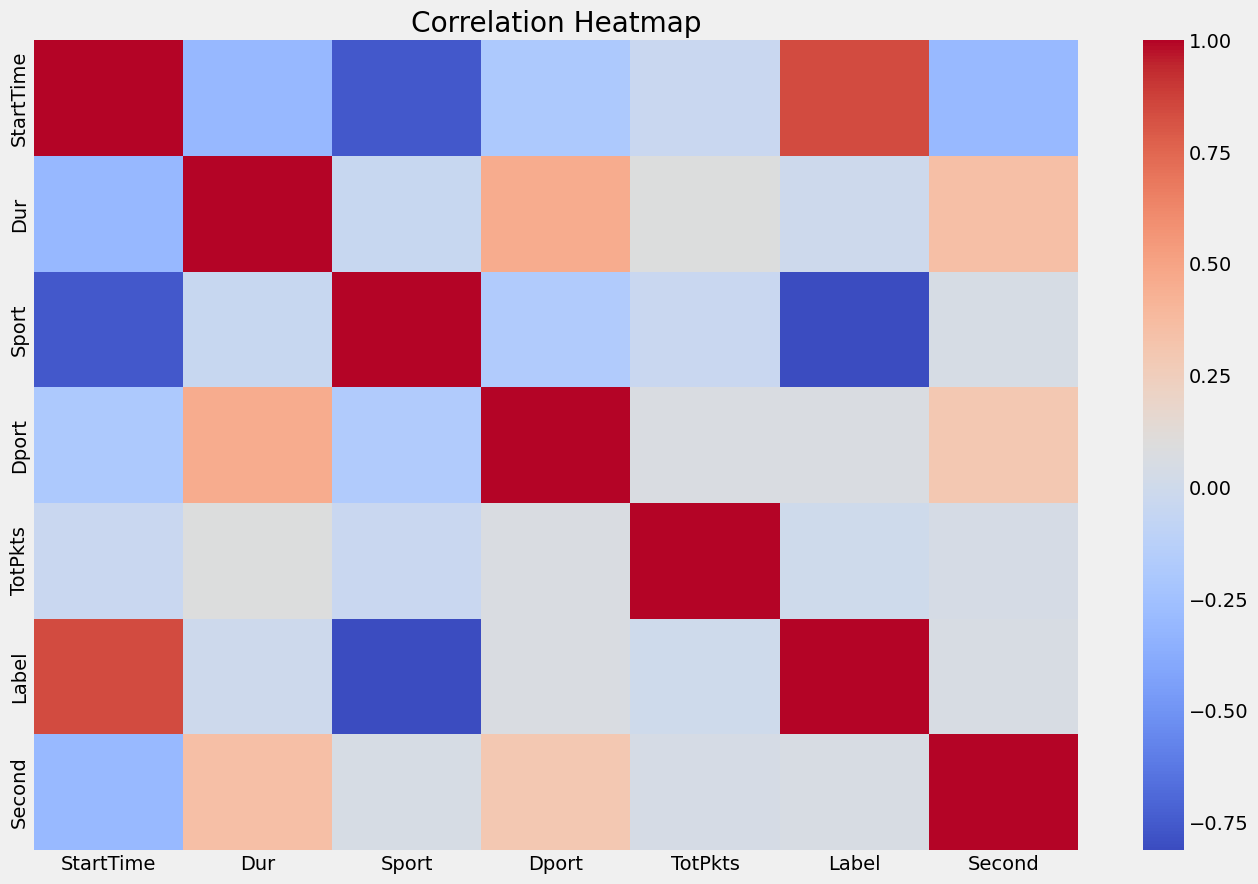

In [41]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [42]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Second
0,2011-08-10 09:46:53.160043,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54230,INT,1,0,53
1,2011-08-10 09:46:54.045343,0.000000,udp,147.32.80.9,53,->,147.32.86.111,58314,INT,1,0,54
2,2011-08-10 09:46:54.460552,0.000000,udp,147.32.80.9,53,->,147.32.86.111,54823,INT,1,0,54
3,2011-08-10 09:46:54.779125,0.000291,udp,147.32.84.134,40693,<->,147.32.80.9,53,CON,2,0,54
4,2011-08-10 09:46:54.779641,0.000321,udp,147.32.84.134,47415,<->,147.32.80.9,53,CON,2,0,54


In [43]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'TotPkts', 'Label', 'Second'],
      dtype='object')

In [44]:
# Convert Source and Destination IP addresses to numerical values using hashing
data['SrcAddr'] = data['SrcAddr'].apply(lambda x: hash(x) % (2**16))
data['DstAddr'] = data['DstAddr'].apply(lambda x: hash(x) % (2**16))

# If Source Port or Destination Port have NaN values, fill them with a placeholder (e.g., 0 or -1)
data['SrcAddr'] = data['SrcAddr'].fillna(-1).astype(int)
data['DstAddr'] = data['DstAddr'].fillna(-1).astype(int)

# Convert Source and Destination IP addresses to numerical values using hashing
test_data['SrcAddr'] = test_data['SrcAddr'].apply(lambda x: hash(x) % (2**16))
test_data['DstAddr'] = test_data['DstAddr'].apply(lambda x: hash(x) % (2**16))

# If Source Port or Destination Port have NaN values, fill them with a placeholder (e.g., 0 or -1)
test_data['SrcAddr'] = test_data['SrcAddr'].fillna(-1).astype(int)
test_data['DstAddr'] = test_data['DstAddr'].fillna(-1).astype(int)

In [45]:
data.dtypes

,0
StartTime,datetime64[ns]
Dur,float64
Proto,object
SrcAddr,int64
Sport,int64
Dir,object
DstAddr,int64
Dport,int64
State,object
TotPkts,int64


In [46]:
data = data.drop(columns=['StartTime'])
data = data.drop(columns=['SrcAddr','Sport'])

test_data = test_data.drop(columns=['StartTime'])
test_data = test_data.drop(columns=['SrcAddr','Sport'])

In [186]:
X = data.drop(columns=['Label'])
y = data[['Label']]

X_test = test_data.drop(columns=['Label'])
y_test = test_data[['Label']]

In [187]:
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,0.000000,udp,->,32778,54230,INT,1,53
1,0.000000,udp,->,32778,58314,INT,1,54
2,0.000000,udp,->,32778,54823,INT,1,54
3,0.000291,udp,<->,17870,53,CON,2,54
4,0.000321,udp,<->,17870,53,CON,2,54


In [188]:
categorical_cols = ['Proto', 'State', 'Dir']

In [189]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()
X[categorical_cols] = le.fit_transform(X[categorical_cols])
X_test[categorical_cols] = le.transform(X_test[categorical_cols])
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,0.000000,3.0,0.0,32778,54230,30.0,1,53
1,0.000000,3.0,0.0,32778,58314,30.0,1,54
2,0.000000,3.0,0.0,32778,54823,30.0,1,54
3,0.000291,3.0,2.0,17870,53,1.0,2,54
4,0.000321,3.0,2.0,17870,53,1.0,2,54


In [190]:
y.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [191]:
processed_data = pd.concat([X_test,y_test],axis=1)
# test_processed_data = pd.concat([X_test,y_test],axis=1)
processed_data.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second,Label
0,0.000000,3.0,0.0,32778,54230,30.0,1,53,0
1,0.000000,3.0,0.0,32778,58314,30.0,1,54,0
2,0.000000,3.0,0.0,32778,54823,30.0,1,54,0
3,0.000291,3.0,2.0,17870,53,1.0,2,54,0
4,0.000321,3.0,2.0,17870,53,1.0,2,54,0


In [192]:
processed_data.shape

(2977, 9)

In [193]:
processed_data2 = processed_data.values.copy()

In [194]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
processed_data = scaler.fit_transform(processed_data)
# test_processed_data = scaler.transform(test_processed_data)

In [195]:
processed_data

array([[-0.41891373,  1.01058111, -1.07670303, ..., -0.05189738,
         0.84412436, -1.22075613],
       [-0.41891373,  1.01058111, -1.07670303, ..., -0.05189738,
         0.89765306, -1.22075613],
       [-0.41891373,  1.01058111, -1.07670303, ..., -0.05189738,
         0.89765306, -1.22075613],
       ...,
       [-0.41119825, -0.96869519, -1.07670303, ..., -0.05134309,
        -0.44056438,  1.21993629],
       [-0.41558161, -0.96869519, -1.07670303, ..., -0.04968022,
        -0.44056438,  1.21993629],
       [-0.41094122, -0.96869519, -1.07670303, ..., -0.05134309,
        -0.44056438,  1.21993629]])

In [196]:
processed_data.shape

(2977, 9)

In [197]:
import tensorflow as tf
from tensorflow.keras import layers
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define GAN components
latent_dim = 32  # Dimension of noise vector

# Generator
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        layers.Dense(processed_data.shape[1], activation='sigmoid')  # Match the feature size
    ])
    return model

# Discriminator
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=processed_data.shape[1]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Initialize models
generator = build_generator()
discriminator = build_discriminator()

In [198]:
generator.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,593 (45.29 KB)

 Trainable params: 11,593 (45.29 KB)

 Non-trainable params: 0 (0.00 B)

In [199]:
discriminator.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

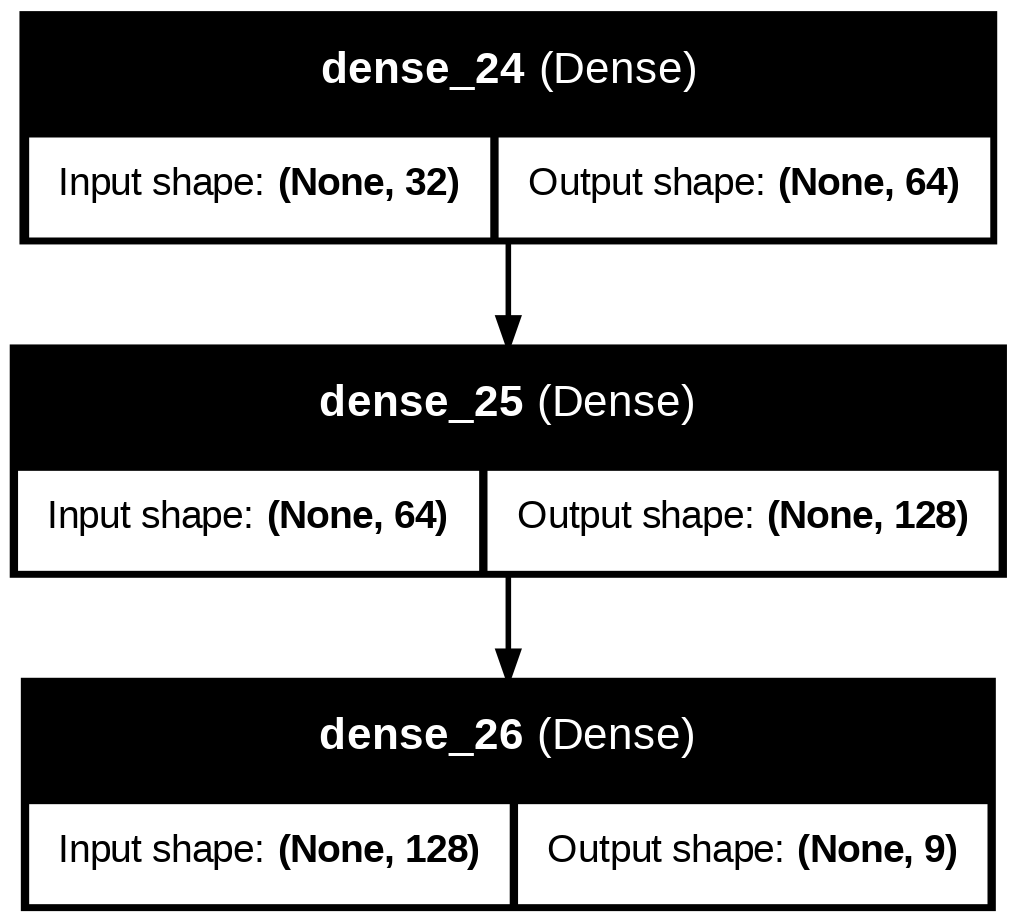

In [200]:
from tensorflow.keras.utils import plot_model
plot_model(generator, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

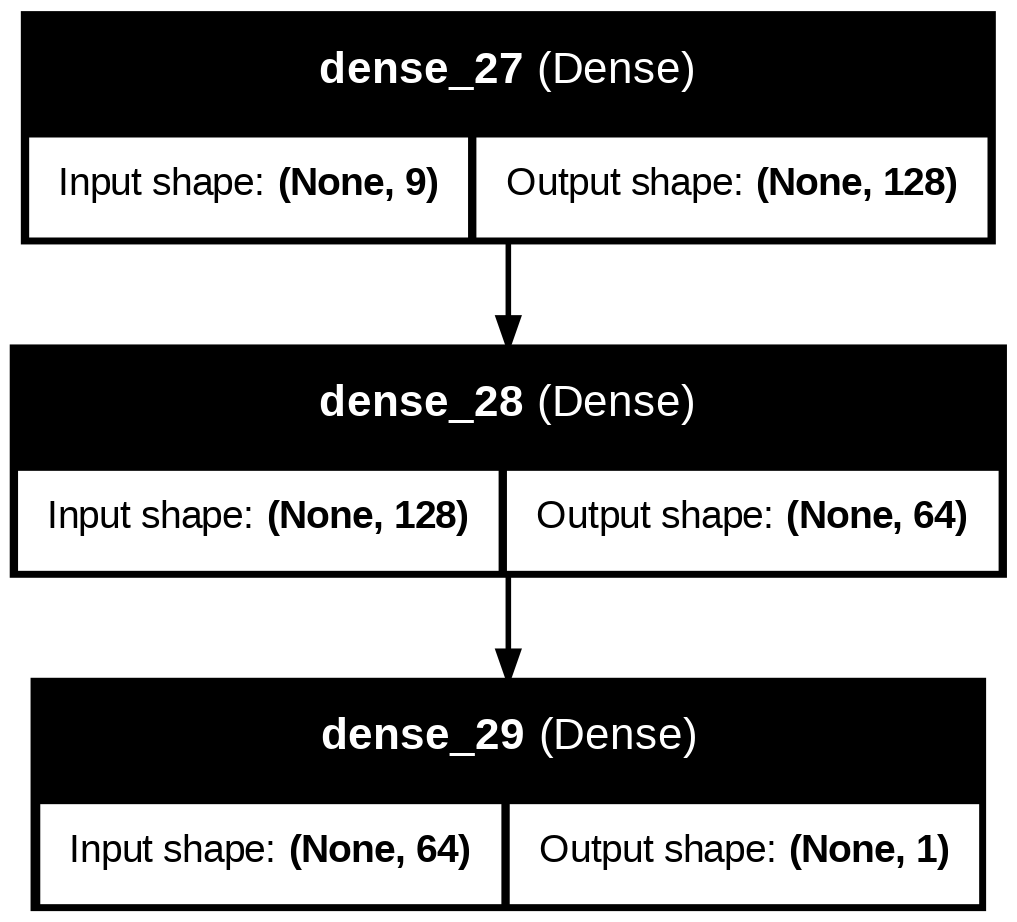

In [201]:
plot_model(discriminator, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [202]:
# Compile discriminator
discriminator.compile(optimizer=tf.keras.optimizers.Adam(0.0002), loss='binary_crossentropy', metrics=['accuracy'])

# GAN Model (Generator + Discriminator)
discriminator.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer=tf.keras.optimizers.Adam(0.0002), loss='binary_crossentropy')

In [203]:
# Training GAN
epochs = 10
batch_size = 32

In [204]:
# Dictionary to store metrics
metrics = {
    "epoch": [],
    "d_loss": [],
    "g_loss": [],
    "d_acc": []
}

# Training loop with tqdm for progress bar
for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    # Train Discriminator
    idx = np.random.randint(0, processed_data.shape[0], batch_size)
    real_data = processed_data[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_data = generator.predict(noise)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_data, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_labels)

    # Save metrics
    metrics["epoch"].append(epoch)
    metrics["d_loss"].append(d_loss[0])
    metrics["g_loss"].append(g_loss)
    metrics["d_acc"].append(100 * d_loss[1])

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} - D Loss: {d_loss[0]:.4f}, D Acc: {d_loss[1] * 100:.2f}%, G Loss: {g_loss:.4f}")

Training Progress:   0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Training Progress:  10%|█         | 1/10 [00:01<00:11,  1.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training Progress:  30%|███       | 3/10 [00:01<00:02,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training Progress:  40%|████      | 4/10 [00:01<00:01,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Training Progress:  50%|█████     | 5/10 [00:01<00:01,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Training Progress:  70%|███████   | 7/10 [00:01<00:00,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training Progress:  90%|█████████ | 9/10 [00:01<00:00,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training Progress: 100%|██████████| 10/10 [00:02<00:00,  4.76it/s]


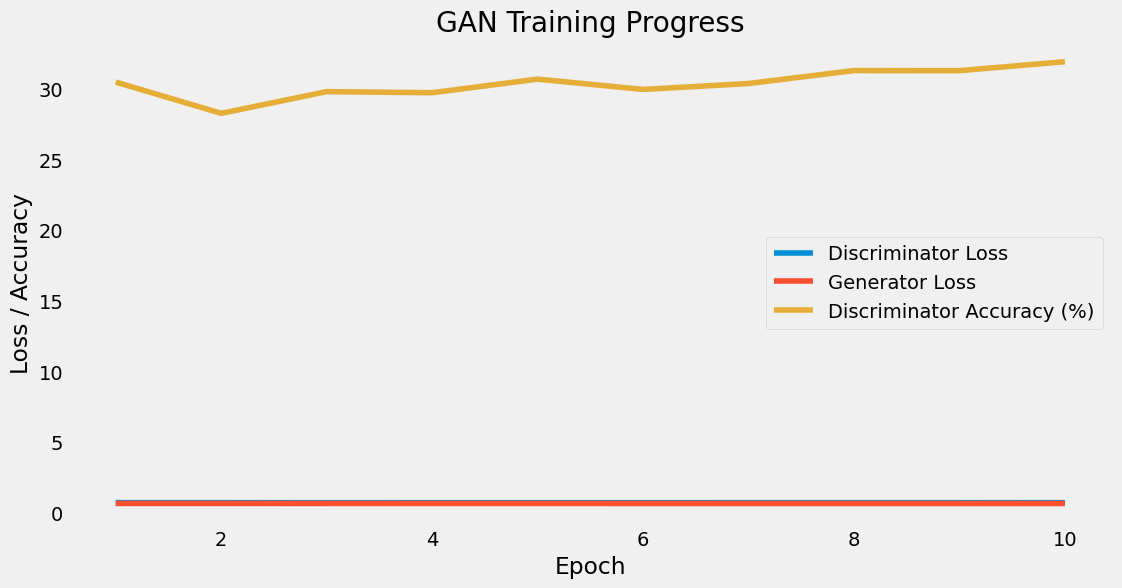

In [205]:
# Plot metrics
plt.figure(figsize=(12, 6))
plt.plot(metrics["epoch"], metrics["d_loss"], label="Discriminator Loss")
plt.plot(metrics["epoch"], metrics["g_loss"], label="Generator Loss")
plt.plot(metrics["epoch"], metrics["d_acc"], label="Discriminator Accuracy (%)")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.title("GAN Training Progress")
plt.legend()
plt.grid()
plt.show()

In [206]:
noise = np.random.normal(0, 1, (processed_data.shape[0], latent_dim))
synthetic_data = generator.predict(noise)
synthetic_data = processed_data.copy()
synthetic_data = scaler.inverse_transform(synthetic_data)
synthetic_data[:,-1] = y_test.values.ravel()
print("Synthetic Data:")
print(synthetic_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Synthetic Data:
[[0.00000000e+00 3.00000000e+00 2.22044605e-16 ... 1.00000000e+00
  5.30000000e+01 0.00000000e+00]
 [0.00000000e+00 3.00000000e+00 2.22044605e-16 ... 1.00000000e+00
  5.40000000e+01 0.00000000e+00]
 [0.00000000e+00 3.00000000e+00 2.22044605e-16 ... 1.00000000e+00
  5.40000000e+01 0.00000000e+00]
 ...
 [8.35856300e+00 2.00000000e+00 2.22044605e-16 ... 3.00000000e+00
  2.90000000e+01 2.00000000e+00]
 [3.60984800e+00 2.00000000e+00 2.22044605e-16 ... 9.00000000e+00
  2.90000000e+01 2.00000000e+00]
 [8.63701500e+00 2.00000000e+00 2.22044605e-16 ... 3.00000000e+00
  2.90000000e+01 2.00000000e+00]]


In [207]:
synthetic_data.shape

(2977, 9)

In [208]:
X_test = synthetic_data[:,:-1]
y_test = synthetic_data[:,-1]

# X_test = test_processed_data[:,:-1]
# y_test = test_processed_data[:,-1]

In [209]:
X_train = X.copy()
y_train = y.copy()

In [210]:
np.unique(y_train)

array([0, 1, 2])

In [211]:
np.unique(y_test)

array([0., 1., 2.])

In [212]:
X_train.shape,X_test.shape

((2977, 8), (2977, 8))

In [213]:
y_train.shape,y_test.shape

((2977, 1), (2977,))

In [214]:
y_train.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [215]:
y_train = y_train['Label'].values.ravel()

In [216]:
label = np.unique(y).tolist()
label

[0, 1, 2]

In [217]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [218]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

Results for LogisticRegression:

Training time (sec) = 0.034671783447265625
Prediction time (sec) = 0.00037550926208496094

Training score = 0.8506669491577467
Testing score = 0.8506669491577467

No of misclassified for class 0 (test data) = 87
No of misclassified for class 1 (test data) = 85
No of misclassified for class 2 (test data) = 274
Total no of misclassified points (test data) = 446
Total % of misclassified points (test data) = 0.1498152502519315

Training log_loss = 0.3906327435111689
Testing log_loss = 0.3906327435111689

Confusion matrix:


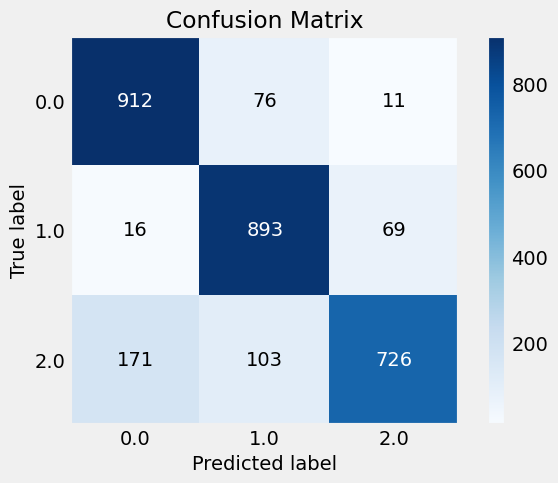

Classification report:

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       999
         1.0       0.83      0.91      0.87       978
         2.0       0.90      0.73      0.80      1000

    accuracy                           0.85      2977
   macro avg       0.85      0.85      0.85      2977
weighted avg       0.85      0.85      0.85      2977

**************************************************************************


In [219]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.011117219924926758
Prediction time (sec) = 0.0007145404815673828

Training score = 0.8530169474177653
Testing score = 0.8530169474177653

No of misclassified for class 0 (test data) = 82
No of misclassified for class 1 (test data) = 83
No of misclassified for class 2 (test data) = 274
Total no of misclassified points (test data) = 439
Total % of misclassified points (test data) = 0.14746388982196842

Confusion matrix:


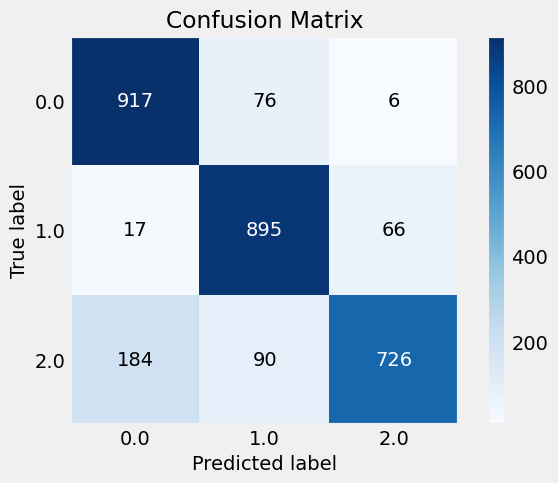

Classification report:

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       999
         1.0       0.84      0.92      0.88       978
         2.0       0.91      0.73      0.81      1000

    accuracy                           0.85      2977
   macro avg       0.86      0.85      0.85      2977
weighted avg       0.86      0.85      0.85      2977

**************************************************************************


In [220]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 0.012060403823852539
Prediction time (sec) = 0.0005390644073486328

Training score = 0.9882970004769596
Testing score = 0.9882970004769596

No of misclassified for class 0 (test data) = 19
No of misclassified for class 1 (test data) = 4
No of misclassified for class 2 (test data) = 12
Total no of misclassified points (test data) = 35
Total % of misclassified points (test data) = 0.01175680214981525

Training log_loss = 0.02312934177395797
Testing log_loss = 0.02312934177395797

Confusion matrix:


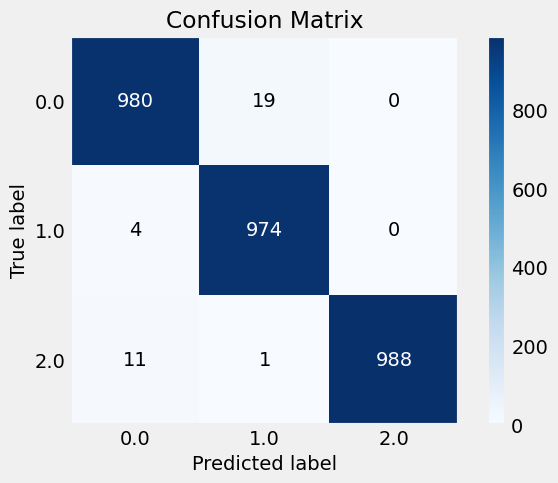

Classification report:

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       999
         1.0       0.98      1.00      0.99       978
         2.0       1.00      0.99      0.99      1000

    accuracy                           0.99      2977
   macro avg       0.99      0.99      0.99      2977
weighted avg       0.99      0.99      0.99      2977

**************************************************************************


In [221]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 0.23121190071105957
Prediction time (sec) = 0.03796076774597168

Training score = 0.9882970004769596
Testing score = 0.9882970004769596

No of misclassified for class 0 (test data) = 19
No of misclassified for class 1 (test data) = 4
No of misclassified for class 2 (test data) = 12
Total no of misclassified points (test data) = 35
Total % of misclassified points (test data) = 0.01175680214981525

Training log_loss = 0.02318889105402226
Testing log_loss = 0.02318889105402226

Confusion matrix:


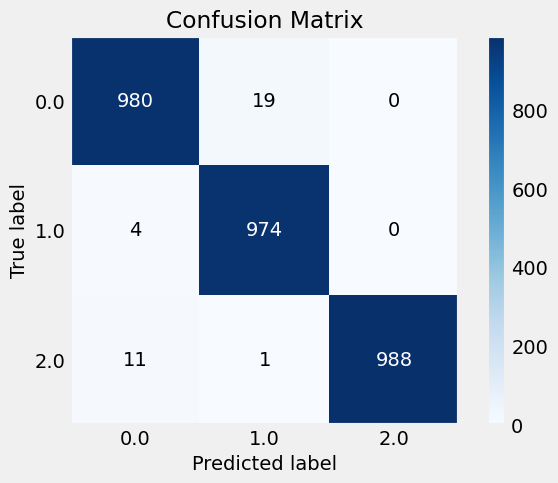

Classification report:

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       999
         1.0       0.98      1.00      0.99       978
         2.0       1.00      0.99      0.99      1000

    accuracy                           0.99      2977
   macro avg       0.99      0.99      0.99      2977
weighted avg       0.99      0.99      0.99      2977

**************************************************************************


In [222]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 0.4724156856536865
Prediction time (sec) = 0.03370475769042969

Training score = 0.9882970004769596
Testing score = 0.9882970004769596

No of misclassified for class 0 (test data) = 19
No of misclassified for class 1 (test data) = 4
No of misclassified for class 2 (test data) = 12
Total no of misclassified points (test data) = 35
Total % of misclassified points (test data) = 0.01175680214981525

Training log_loss = 0.041481290701490474
Testing log_loss = 0.041481290701490474

Confusion matrix:


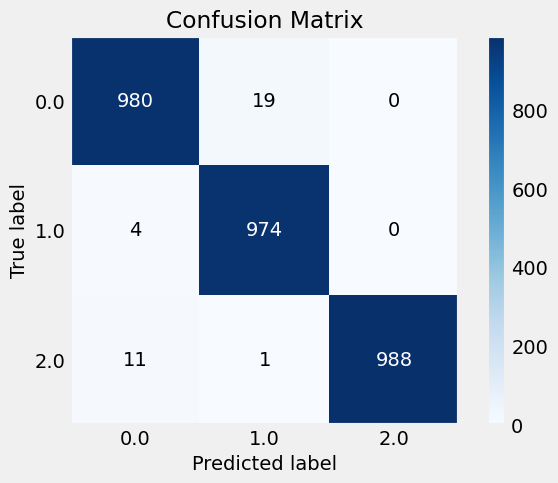

Classification report:

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       999
         1.0       0.98      1.00      0.99       978
         2.0       1.00      0.99      0.99      1000

    accuracy                           0.99      2977
   macro avg       0.99      0.99      0.99      2977
weighted avg       0.99      0.99      0.99      2977

**************************************************************************


In [223]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

In [224]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results]
s2=['LR','LSVC','DTC','ETC','RFC']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,LR,0.850667,0.850667,446,0.149815,0.390633,0.390633,0.034672,0.000376
1,LSVC,0.853017,0.853017,439,0.147464,NaN,NaN,0.011117,0.000715
2,DTC,0.988297,0.988297,35,0.011757,0.023129,0.023129,0.012060,0.000539
3,ETC,0.988297,0.988297,35,0.011757,0.023189,0.023189,0.231212,0.037961
4,RFC,0.988297,0.988297,35,0.011757,0.041481,0.041481,0.472416,0.033705


In [181]:
scaler

StandardScaler()

In [182]:
rfc

RandomForestClassifier(class_weight='balanced')

In [183]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(scaler, rfc)
joblib.dump(pipeline, 'rfc_pipeline.joblib')

['rfc_pipeline.joblib']

In [184]:
X

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,0.000000,3.0,0.0,32778,54230,30.0,1,53
1,0.000000,3.0,0.0,32778,58314,30.0,1,54
2,0.000000,3.0,0.0,32778,54823,30.0,1,54
3,0.000291,3.0,2.0,17870,53,1.0,2,54
4,0.000321,3.0,2.0,17870,53,1.0,2,54
...,...,...,...,...,...,...,...,...
2995,3.619168,2.0,0.0,8665,80,56.0,8,29
2996,268.866241,2.0,0.0,22735,80,28.0,11,29
2997,8.358563,2.0,0.0,14741,25,59.0,3,29
2998,3.609848,2.0,0.0,56952,80,56.0,9,29


In [185]:
y

,Label
0,0
1,0
2,0
3,0
4,0
...,...
2995,2
2996,2
2997,2
2998,2


In [ ]:
np.save('synthetic_X.npy', X)
np.save('synthetic_y.npy', y)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf /content/drive/MyDrive/save_data && mkdir -p /content/drive/MyDrive/save_data
!mv /content/synthetic_X.npy /content/drive/MyDrive/save_data/.
!mv /content/synthetic_y.npy /content/drive/MyDrive/save_data/.